In [1]:
from PIL import Image
import xml.etree.ElementTree as ET
import re as re
import imageio as imageio

In [2]:
class VARIABLE:
    def __init__(self):
        self.name = ''
        self.value = 0

def Variable2Dict(Variable):
    '''Takes a list of objects of class VARIABLE and returns the data in a dictionary
    return varDict'''
    varDict = {vari.name: vari.value for vari in Variable}
    return varDict


In [127]:
im = Image.open("magAtoms_46.png")

In [128]:
info = im.info
print(info["Settings"])

<?xml version="1.0" encoding="ISO8859-1" standalone="no" ?>
<controlconfig>

  <image>
    <name>magAtoms</name>
    <camera>Camera_Mag</camera>
    <shutteroff>0</shutteroff>
    <sequencelength>1</sequencelength>
    <acquisitionmode>0</acquisitionmode>
    <exposuretime>0.001</exposuretime>
    <isregionofinterest>0</isregionofinterest>
    <offsetx>0</offsetx>
    <offsety>0</offsety>
    <sizex>640</sizex>
    <sizey>480</sizey>
    <detuning>0</detuning>
    <sigma0>2.807E-13</sigma0>
    <custom>0</custom>
    <numofcomponents>1</numofcomponents>
    <toftime>0.0</toftime>
    <trapfreqx></trapfreqx>
    <trapfreqy></trapfreqy>
    <trapfreqz></trapfreqz>
    <mass>1.4446686951E-25</mass>
    <historyscale>1</historyscale>
    <historyoffset>0</historyoffset>
    <fits/>
  </image>

</controlconfig>



In [226]:
print(info["dpi"])

(4233.3164, 4233.3164)


In [130]:
stt = ET.fromstring(info["Settings"])
ctr = ET.fromstring(info["Control"])
ctr

<Element 'controlconfig' at 0x000001907B225E90>

In [131]:
stt.find('.//camera').text

'Camera_Mag'

In [132]:
varis = ctr.find('.//variables')
varis

<Element 'variables' at 0x000001907FCC0130>

In [133]:
vind1 = [m.start() for m in re.finditer("<variable>\n      <name>", info["Control"])]
vind2 = [m.start() for m in re.finditer("</name>\n      <value>", info["Control"])]


In [134]:
numVars = len(vind1)
numVars

219

In [1]:
import os
import pandas as pd
path = os.getcwd()
import glob as glb
import numpy as np
import scipy.signal as spsig
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
import processing.ImgProc as IP
from processing.load import ReadImage
import numpy as np


In [3]:
dark, bright, atoms = "magDark_3.png", "magBright_3.png", "magAtoms_3.png"


In [4]:
m = IP.Meassurement(dark, bright, atoms, "BEC", 1.2, pixelSize = 7.5e-6)

In [5]:
m.cropImage()

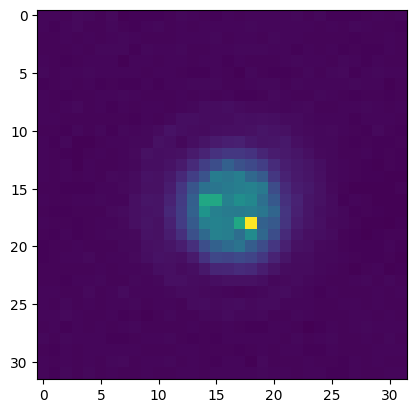

In [6]:
plt.imshow(m.ROI, vmax = 10)

In [7]:
m.FitROI()

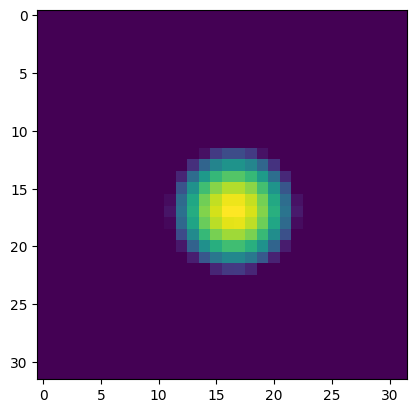

In [8]:
plt.imshow(m.fitted_image)

In [9]:
m.calculateResults()

In [10]:
m.results


{'Fitted Atom Number': 43826.79828814897,
 'Integrated Atom Number': 43826.80230626296,
 'Temperature': 0}

In [52]:
m.variables["ToFTime"] = 0.09

In [36]:
from processing.SaverLoader import saveData, LoadData, saveData2
import time

In [16]:
for i in range(30):
    saveData(m, "","processedData.db" )
    time.sleep(1)

In [40]:
saveData2(m, "", "processedData.pkl")

In [53]:
saveData(m, "","processedData.db" )

In [44]:
data = LoadData("processedData.db", load_all= True)
#image = data[-1]["ROI"]

In [45]:
len(data)

2

In [15]:
for i in range(-1):
    print(i)

In [111]:
x = [1,2,3,1,2,3,1,2,3]
y = [1*1,2*1,0*1,1*2,2*2,0*2,1*3,2*3,0*3]
dict1 = {"x":x, "y": y}
dict1["x"] = x
dict1["y"] = y
df = pd.DataFrame.from_dict(dict1)
new_df = df.groupby('x').mean().reset_index()
new_df

,x,y
0,1,2.0
1,2,4.0
2,3,0.0


In [114]:
new_df2 = df.groupby('x').std().reset_index()

In [115]:
new_df2['x'].values

array([1, 2, 3], dtype=int64)

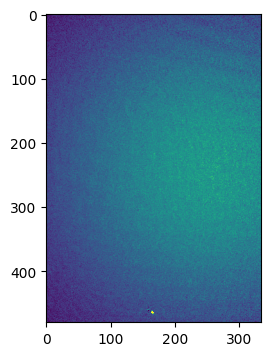

In [33]:
figure, ax = plt.subplots(figsize=(6, 4))
colormap = "viridis"
norm_value = 0.04
ax.imshow(image/np.max(image), cmap=colormap, vmin = 0, vmax = norm_value)
        

In [36]:
sorted(list(m.variables.keys()))

['AboveDResonanceCurrent',
 'AbsHFFreq',
 'AddSpeciesDetuning',
 'AddSpeciesIntensity',
 'AddSpeciesMOTRepumperIntensity',
 'AddSpeciesMolassesIntensity',
 'AddSpeciesMolassesRepumper',
 'AndorCleanTime',
 'AndorCleanTime1',
 'AndorIntermediateTime',
 'AndorReadoutTime',
 'AndorShutterTime',
 'BCTransferTime',
 'BECThermalization',
 'BShiftDecompressed',
 'BShiftQuadrupoleV',
 'BelowDResonanceCurrent',
 'BlowingPulse',
 'BraggAOMFreq',
 'BraggPulse',
 'CF150CompensationHF',
 'CF150Shift',
 'CF150ShiftDecompressed',
 'CF150VerticalBiasDecompressed',
 'CMOTAddSpeciesDetuning',
 'CMOTCurrent',
 'CMOTD1Detuning',
 'CMOTDetuningCooler',
 'CMOTDetuningRepumper',
 'CMOTHoldTime',
 'CMOTIntensityCooler',
 'CMOTIntensityRepumper',
 'CMOTRampTime',
 'Calibration',
 'CalibrationCF150',
 'CalibrationCLX',
 'CalibrationCLY',
 'CalibrationFeshbach',
 'CalibrationOP',
 'CleaningTime39',
 'CloverLeafCurrentX',
 'CloverLeafCurrentY',
 'CompensationCL',
 'CompensationCLX',
 'CompensationCLY',
 'Compress

In [18]:
data = LoadData("processedData.pkl")

In [36]:
IntAtomNum = []
FitAtomNum = []
variables = []
for image in data:
    FitAtomNum.append(image["Results"]['Fitted Atom Number'])
    IntAtomNum.append(image["Results"]['Integrated Atom Number'])
    variables.append(image["Variables"])

In [44]:
x = list(grouped_data.keys())

In [114]:
var = [10000, 10000]
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas

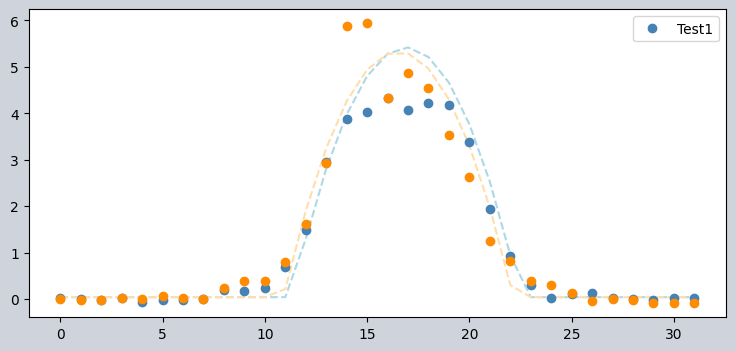

In [149]:
figure, ax = plt.subplots(figsize=(6*1.5, 4), facecolor='#CED3DC')
canvas = FigureCanvas(figure)
ax.plot(m.ROI[:,m.center[1]], 'o', color = 'steelblue', zorder = 2, label = "Test1")
ax.plot(m.fitted_image[:, m.center[1]], '--', color = 'lightblue', zorder = 1)

ax.plot(m.ROI[m.center[0],:],'o', color = 'darkorange', zorder = 2)
ax.plot(m.fitted_image[m.center[0],:],'--', color = 'navajowhite', zorder = 1)
ax.legend()
canvas.draw()

In [117]:
ax.set_xlim([0.4, 0.90])
canvas.draw()



In [127]:
import datetime
datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

'2024-11-13 10:40:08'

In [31]:
a = "Center x"
print(a[:-2])

Center


In [20]:
y = np.arange(9)
x = [1,2,3]*3
x, y

([1, 2, 3, 1, 2, 3, 1, 2, 3], array([0, 1, 2, 3, 4, 5, 6, 7, 8]))

In [24]:
df = pd.DataFrame({'x': x, 'y': y})
grouped_df = df.groupby('x')['y'].mean().reset_index()
grouped_std = df.groupby('x')['y'].std().reset_index()
df

,x,y
0,1,0
1,2,1
2,3,2
3,1,3
4,2,4
5,3,5
6,1,6
7,2,7
8,3,8


In [17]:
x = grouped_df['x'].values
averaged_y = grouped_df['y'].values
std_y = grouped_std['y'].values

In [18]:
x, averaged_y

(array([1, 2, 3], dtype=int64), array([3., 4., 5.]))

In [22]:
grouped_df

,x,y
0,1,3.0
1,2,4.0
2,3,5.0


In [31]:
grouped_df = df.groupby('x').mean()
grouped_df.head()

,y
x,
1,3.0
2,4.0
3,5.0


In [34]:
m.variables

{'MOTLoadingTime': 11.0,
 'CMOTRampTime': 0.006,
 'CMOTHoldTime': 0.001,
 'MOTCurrent': 13.0,
 'CMOTCurrent': 11.0,
 'MOTDetuningCooler': -6.7,
 'CMOTDetuningCooler': -3.0,
 'MOTDetuningRepumper': -2.7,
 'CMOTDetuningRepumper': -0.8,
 'MOTIntensityCooler': 0.99,
 'MOTIntensityRepumper': 0.99,
 'CMOTIntensityCooler': 0.05,
 'CMOTIntensityRepumper': 0.001,
 'D1Intensity': 1.0,
 'MolassesDetuning': 4.7,
 'PushDetuning': 5.3,
 'ToFTime': 0.005,
 'ExposureTime': 5e-05,
 'ProbeDetuning': 1.8,
 'fitingTime': 3.0,
 'Molasses1Time': 0.005,
 'MolassesRampTime': 0.003,
 'MolassesRampD1Intensity': 0.2,
 'OP2': 0.0002,
 'OP1': 0.00025,
 'OPD1Detuning': 4.3,
 'MagTrapCompressionTime': 1.0,
 'MagTrapDecompressionTime': 0.5,
 'MagTrapCatchCurrent': 35.0,
 'MagTrapCompressedCurrent': 180.0,
 'MagTrapDecompressedCurrent': 30.0,
 'MagTrapCatchTime': 0.015,
 'MagTrapThermTime': 0.1,
 'OP3': 0.00025,
 'MagTrapCleaningTime': 0.1,
 'MagTrapCleaningCurrent': 22.0,
 'MagTrapCleaningRampTime': 0.1,
 'YAGPower':

In [59]:
dict1 = {'a': 1, 'b': 2, 'c': 3}
dict2 = {'a': 1, 'b': 4, 'c': 1}

# Find keys with different values
different_keys = [key for key in dict1 if key in dict2 and dict1[key] != dict2[key]]
a = different_keys.copy()

In [60]:
different_keys.remove('b')
different_keys.remove('c')

In [61]:
a

['b', 'c']

In [117]:
import pkg_resources

In [ ]:
version = pkg_resources.get_distribution("sqlite3").version
print(f"version: {version}")

DistributionNotFound: The 'sqlite3' distribution was not found and is required by the application

In [127]:
import sqlite3 